In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils.data_extractor import download_single_ticker_forex_data

In [3]:
eur_to_inr = download_single_ticker_forex_data("EUR", "INR")

/Users/arjunprakashrao/Drive/projects/forex-agent/utils/data_extractor.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  forex_data = yf.download(ticker_full, start='2000-01-02', end='2025-10-01')
[*********************100%***********************]  1 of 1 completed


In [4]:
eur_to_inr

,Close_EURINR=X
Date,
2003-12-01,54.700001
2003-12-02,55.139000
2003-12-03,55.181000
2003-12-04,55.000999
2003-12-05,55.370998
...,...
2025-08-25,100.411003
2025-08-26,101.669998
2025-08-27,101.920998


In [5]:
eur_to_inr['log_returns'] = np.log(eur_to_inr['Close_EURINR=X']/eur_to_inr['Close_EURINR=X'].shift(1))
eur_to_inr.dropna(inplace=True)
eur_to_inr

,Close_EURINR=X,log_returns
Date,,
2003-12-02,55.139000,0.007994
2003-12-03,55.181000,0.000761
2003-12-04,55.000999,-0.003267
2003-12-05,55.370998,0.006705
2003-12-08,55.563999,0.003480
...,...,...
2025-08-25,100.411003,-0.008815
2025-08-26,101.669998,0.012460
2025-08-27,101.920998,0.002466


# Graphs

<Axes: xlabel='Date'>

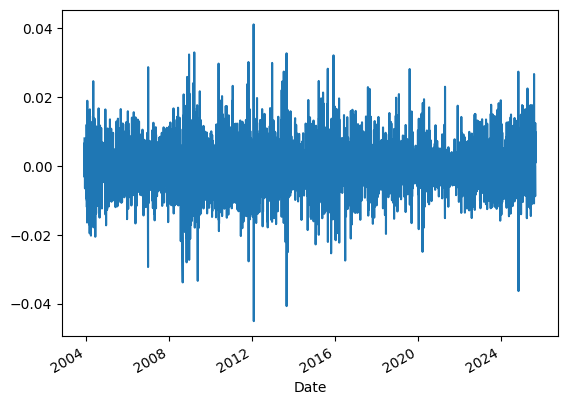

In [6]:
eur_to_inr['log_returns'].plot()

In [7]:
eur_to_inr.sum(), eur_to_inr.mean(), eur_to_inr.std()

(Close_EURINR=X    412000.650467
 log_returns            0.632948
 dtype: float64,
 Close_EURINR=X    73.036811
 log_returns        0.000112
 dtype: float64,
 Close_EURINR=X    12.152075
 log_returns        0.006861
 dtype: float64)

# Time series analysis

In [9]:
from statsmodels.tsa.stattools import adfuller
from models.time_series import time_series as ts

In [ ]:
# Using ADF test to check for stationarity
eur_to_inr_list = eur_to_inr['log_returns'].to_list()
ad_stats = adfuller(eur_to_inr_list, regression='ct', autolag='BIC')
ad_stats

(np.float64(-33.333469079013376),
 0.0,
 4,
 5636,
 {'1%': np.float64(-3.9603771945043054),
  '5%': np.float64(-3.411269276915042),
  '10%': np.float64(-3.1275088887722604)},
 np.float64(-40061.873443233635))

In [14]:
# Simple moving average

eur_to_inr = ts.simple_moving_average(price_movement=eur_to_inr, price_row='Close_EURINR=X', periods=360)
eur_to_inr

,Close_EURINR=X,log_returns,SMA_last_50,SMA_last_100,SMA_last_360
Date,,,,,
2003-12-02,55.139000,0.007994,NaN,NaN,NaN
2003-12-03,55.181000,0.000761,NaN,NaN,NaN
2003-12-04,55.000999,-0.003267,NaN,NaN,NaN
2003-12-05,55.370998,0.006705,NaN,NaN,NaN
2003-12-08,55.563999,0.003480,NaN,NaN,NaN
...,...,...,...,...,...
2025-08-25,100.411003,-0.008815,100.62298,98.499460,92.814875
2025-08-26,101.669998,0.012460,100.67482,98.575240,92.846964
2025-08-27,101.920998,0.002466,100.73310,98.663400,92.879158


<Axes: xlabel='Date'>

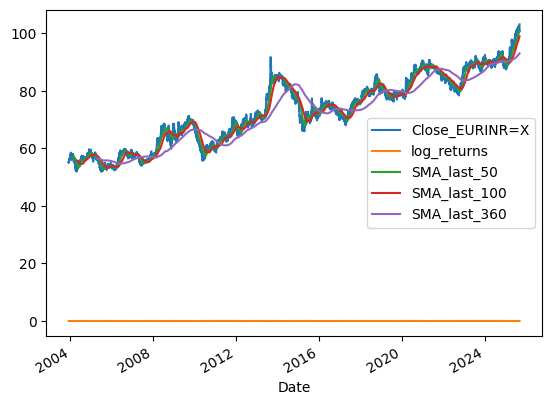

In [15]:
eur_to_inr.plot()